In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import bond_pricing 
import bond_pricing as bp
import datetime as dt




D:\temp\ipykernel_29044\3505705717.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
e:\anaconda\envs\APM466_packages\lib\site-packages\bond_pricing\simple_bonds.py:529: UserWarning: Module isda_daycounters is not installed.
Only 'simple' daycount (basically ACT/365) is available.
To use other daycounts, install isda_daycounters from
https://github.com/miradulo/isda_daycounters
  warn("Module isda_daycounters is not installed.\n"


In [66]:
df = pd.read_csv('bond_close.csv')
df 

,ISIN,Coupon,Issue Date,Maturity Date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-22
0,CA135087B451,2.500%,7/2/2013,6/1/2024,99.037,99.040,99.053,99.064,99.090,99.111,99.069,99.076,99.099,99.113,99.121
1,CA135087D507,2.250%,6/30/2014,6/1/2025,97.399,97.399,97.420,97.362,97.495,97.485,97.324,97.173,97.147,97.160,97.150
2,CA135087E679,1.500%,7/21/2015,6/1/2026,94.970,95.010,95.060,95.060,95.170,95.140,95.000,94.740,94.690,94.660,94.600
3,CA135087J546,2.250%,10/5/2018,3/1/2024,99.630,99.640,99.650,99.661,99.670,99.687,99.680,99.683,99.708,99.720,99.724
4,CA135087J967,1.500%,4/5/2019,9/1/2024,97.960,97.980,97.985,97.982,98.021,98.054,97.974,97.975,97.999,98.007,98.034
5,CA135087K528,1.250%,10/11/2019,3/1/2025,96.460,96.482,96.552,96.576,96.661,96.715,96.540,96.448,96.495,96.460,96.463
6,CA135087K940,0.500%,4/3/2020,9/1/2025,94.340,94.370,94.380,94.430,94.490,94.490,94.420,94.250,94.240,94.220,94.164
7,CA135087L518,0.250%,10/9/2020,3/1/2026,92.862,92.860,92.844,92.856,93.023,93.008,92.796,92.570,92.546,92.545,92.555
8,CA135087L690,0.250%,10/16/2020,4/1/2024,98.988,99.005,99.019,99.059,99.076,99.090,99.084,99.099,99.137,99.150,99.163
9,CA135087L930,1.000%,4/16/2021,9/1/2026,93.460,93.440,93.550,93.530,93.600,93.570,93.400,93.120,93.080,93.070,93.000


In [67]:
bp.bond_yield(settle="2024-01-08", mat="2024-03-01", cpn=0.025,
price=99.33, freq=2)

0.07144366683550062

In [68]:
## for the raw df, create a new dataframe with only maturity date that has either Mar 1 or Sep 1, and year before 2029, not inclusive
df['Maturity Date'] = pd.to_datetime(df['Maturity Date'])

## only keep rows with maturity date before 2029 and after 2024 march30
df = df[df['Maturity Date'] < '2030-01-01']
df = df[df['Maturity Date'] > '2024-08-01']


## only keep rows with maturity date that has either Mar 1 or Sep 1
df = df[(df['Maturity Date'].dt.month == 3) | (df['Maturity Date'].dt.month == 9) | (df['Maturity Date'].dt.month == 12)]




## sort the dataframe by maturity date
df = df.sort_values(by='Maturity Date')
df

## row index reset
df = df.reset_index(drop=True)
df

,ISIN,Coupon,Issue Date,Maturity Date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-22
0,CA135087J967,1.500%,4/5/2019,2024-09-01,97.960,97.980,97.985,97.982,98.021,98.054,97.974,97.975,97.999,98.007,98.034
1,CA135087K528,1.250%,10/11/2019,2025-03-01,96.460,96.482,96.552,96.576,96.661,96.715,96.540,96.448,96.495,96.460,96.463
2,CA135087K940,0.500%,4/3/2020,2025-09-01,94.340,94.370,94.380,94.430,94.490,94.490,94.420,94.250,94.240,94.220,94.164
3,CA135087L518,0.250%,10/9/2020,2026-03-01,92.862,92.860,92.844,92.856,93.023,93.008,92.796,92.570,92.546,92.545,92.555
4,CA135087L930,1.000%,4/16/2021,2026-09-01,93.460,93.440,93.550,93.530,93.600,93.570,93.400,93.120,93.080,93.070,93.000
5,CA135087M847,1.250%,10/15/2021,2027-03-01,93.282,93.301,93.245,93.186,93.467,93.493,93.141,92.856,92.753,92.764,92.826
6,CA135087N837,2.750%,5/13/2022,2027-09-01,97.580,97.591,97.603,97.520,97.740,97.772,97.441,97.092,96.956,96.947,96.940
7,CA135087P576,3.500%,10/21/2022,2028-03-01,100.500,100.480,100.439,100.328,100.637,100.673,100.220,99.834,99.662,99.623,99.672
8,CA135087Q491,3.250%,4/21/2023,2028-09-01,99.740,99.720,99.720,99.550,99.880,99.910,99.440,98.990,98.810,98.770,98.830
9,CA135087Q988,4.000%,10/13/2023,2029-03-01,103.406,103.380,103.279,103.132,103.542,103.552,102.974,102.483,102.279,102.242,102.413


In [69]:
def dirty_price(close_date, clean_price, coupon_rate):
    """
    given the clean price, dirty price is calculated using the formula:
    dirty price = clean price + accrued interest
    accrued interest = (days since last coupon payment / 365) * coupon rate
    we calculate the days since last coupon payment by taking the difference between the close date and the last coupon date(9/1 or 3/1) whichever is closest to the close date
    """
    if close_date.month < 3:
        last_coupon_date = pd.to_datetime(str(close_date.year - 1) + '-09-01')
    else:
        last_coupon_date = pd.to_datetime(str(close_date.year - 1) + '-03-01')
    days_since_last_coupon = (close_date - last_coupon_date).days
    accrued_interest = (days_since_last_coupon / 365) * coupon_rate
    dirty_price = clean_price + accrued_interest
    return dirty_price


## make a list of the last 11 columns
price_columns = df.columns.tolist()[-11:]

## for each row, calculate the dirty price and create a new df call it df_dirty, with the same columns as df but with dirty price
df_dirty = df.copy()

for i in range(len(df)):
    for col in price_columns:
        clean_price = df.loc[i, col]
        coupon_rate = df.loc[i, 'Coupon'] 
        ## remove the percent sign and convert to float
        coupon_rate = float(coupon_rate.strip('%'))
        dirty_price_value = dirty_price(pd.to_datetime(col), clean_price, coupon_rate)
        df_dirty.loc[i, col] = dirty_price_value
df_dirty





,ISIN,Coupon,Issue Date,Maturity Date,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-22
0,CA135087J967,1.500%,4/5/2019,2024-09-01,98.490137,98.514247,98.523356,98.524466,98.567575,98.612904,98.537014,98.542123,98.570233,98.582342,98.621671
1,CA135087K528,1.250%,10/11/2019,2025-03-01,96.901781,96.927205,97.000630,97.028055,97.116479,97.180753,97.009178,96.920603,96.971027,96.939452,96.952726
2,CA135087K940,0.500%,4/3/2020,2025-09-01,94.516712,94.548082,94.559452,94.610822,94.672192,94.676301,94.607671,94.439041,94.430411,94.411781,94.359890
3,CA135087L518,0.250%,10/9/2020,2026-03-01,92.950356,92.949041,92.933726,92.946411,93.114096,93.101151,92.889836,92.664521,92.641205,92.640890,92.652945
4,CA135087L930,1.000%,4/16/2021,2026-09-01,93.813425,93.796164,93.908904,93.891644,93.964384,93.942603,93.775342,93.498082,93.460822,93.453562,93.391781
5,CA135087M847,1.250%,10/15/2021,2027-03-01,93.723781,93.746205,93.693630,93.638055,93.922479,93.958753,93.610178,93.328603,93.229027,93.243452,93.315726
6,CA135087N837,2.750%,5/13/2022,2027-09-01,98.551918,98.570452,98.589986,98.514521,98.742055,98.796658,98.473192,98.131726,98.003260,98.001795,98.017397
7,CA135087P576,3.500%,10/21/2022,2028-03-01,101.736986,101.726575,101.695164,101.593753,101.912342,101.977110,101.533699,101.157288,100.994877,100.965466,101.043233
8,CA135087Q491,3.250%,4/21/2023,2028-09-01,100.888630,100.877534,100.886438,100.725342,101.064247,101.120959,100.659863,100.218767,100.047671,100.016575,100.103288
9,CA135087Q988,4.000%,10/13/2023,2029-03-01,104.819699,104.804658,104.714616,104.578575,104.999534,105.042411,104.475370,103.995329,103.802288,103.776247,103.980123


## Calculate YTM

In [71]:
## create a dictionary with 11 keys key names are the column names of the last 11 columns, values are empty list
ytm_dict = {}
for col in price_columns:
    ytm_dict[col] = []
ytm_dict

for col in price_columns:
    for i in range(len(df_dirty)):
        price = df_dirty.loc[i, col]
        ## remove the percent sign and convert to float
        coupon_rate = float(df_dirty.loc[i, 'Coupon'].strip('%')) /100
        maturity_date = df_dirty.loc[i, 'Maturity Date']
        ## for maturity date, we need to convert it to string
        maturity_date = str(maturity_date.date())
        ytm_value = bp.bond_yield(settle=col, mat=maturity_date, cpn=coupon_rate, price=price, freq = 3)
        ytm_dict[col].append((maturity_date, ytm_value))
ytm_dict

        
        
        
        

{'2024-01-08': [('2024-09-01', 0.038760171537387894),
  ('2025-03-01', 0.040314980417942556),
  ('2025-09-01', 0.03959889884156921),
  ('2026-03-01', 0.03685096311505864),
  ('2026-09-01', 0.03458788710524823),
  ('2027-03-01', 0.033626679178138864),
  ('2027-09-01', 0.031724376266017866),
  ('2028-03-01', 0.030515885109092367),
  ('2028-09-01', 0.030439147042479197),
  ('2029-03-01', 0.029848410411317305),
  ('2029-12-01', 0.030227365441691398)],
 '2024-01-09': [('2024-09-01', 0.03847527676074895),
  ('2025-03-01', 0.0401479199705513),
  ('2025-09-01', 0.0394514583247864),
  ('2026-03-01', 0.03690167880457169),
  ('2026-09-01', 0.034684284256355315),
  ('2027-03-01', 0.03356644552417847),
  ('2027-09-01', 0.03167273919415703),
  ('2028-03-01', 0.030539755357531513),
  ('2028-09-01', 0.030463541756582932),
  ('2029-03-01', 0.02987440672348465),
  ('2029-12-01', 0.030314235812552093)],
 '2024-01-10': [('2024-09-01', 0.038428790518703904),
  ('2025-03-01', 0.03953861959008772),
  ('2025-

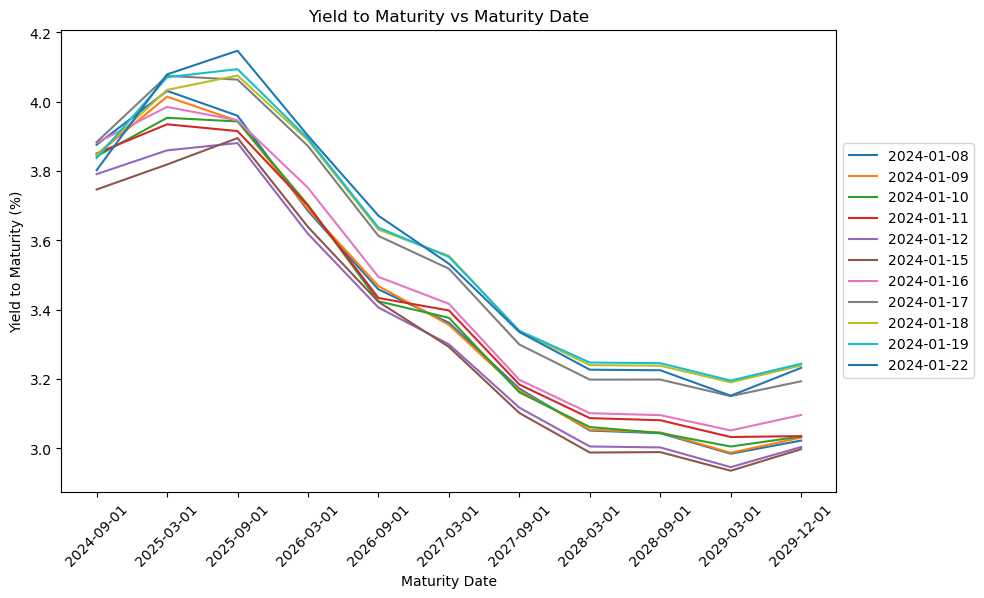

In [72]:
## for each key in the dictionary, plot the values in the list as a line plot
plt.figure(figsize=(10, 6))
for key in ytm_dict:
    x = [i[0] for i in ytm_dict[key]]
    y = [i[1] * 100 for i in ytm_dict[key]]
    # bigger plot so every thing fits, and the legends is outside the plot, so it does not cover the plot
    
    plt.plot(x, y, label=key)
    plt.xlabel('Maturity Date')
    plt.ylabel('Yield to Maturity (%)')
    plt.title('Yield to Maturity vs Maturity Date')
    plt.xticks(rotation=45)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    


   
    


## Calculate Spot Rate Curve

In [73]:

## This is modified from the code given by our TA, thx!
def bootstrap_yield_curve(bonds, start_date):
    """
    given a list of bonds, and the start date, we calculate the spot rates using the bootstrap method
    parameters:
    bonds: a list of tuples, each tuple contains the price, coupon rate, and maturity of a bond
          bond is in the format of (price, coupon_rate, maturity)
          price is dirty price, coupon rate is in decimal, maturity is in fraction of years from the start date. 
    start_date: the date from which we start calculating the spot rates
    """
    spot_rates = np.zeros(len(bonds))

    ## first time_period is the number of days from the first bond maturity to the start date
    
    first_time_period = (bonds[0][2] - start_date).days / 365
    
    
    for i, (price, coupon_rate, maturity) in enumerate(bonds):
        ## Calculate the num of coupon payments
        
        num_coupon_payments = int((maturity - start_date).days // 182.5 )
        
        cash_flows = np.array([coupon_rate/2 * 100] * (num_coupon_payments - 1) + [100 + coupon_rate * 100/2])
        time_periods = [first_time_period]+ [first_time_period + (j+1) * 0.5 for j in range(i-1)]
        if i != 0:
            time_periods.append((maturity - bonds[i-1][2]).days / 365 + time_periods[-1]) # get the time period for the last cash flow
            time_periods = np.array(time_periods)
        # Use previously calculated spot rates for discounted cash flows
        if i == 0:
           
            spot_rate = - np.log(price/ (coupon_rate * 100 /2  + 100)) / first_time_period
            spot_rates[i] = spot_rate
            continue
        else: # for all the other bonds

            discounted_cash_flows = [cf * np.exp(- spot_rates[j] * time_periods[j] ) for j, cf in enumerate(cash_flows[:-1])]
            discounted_cash_flows = np.sum(discounted_cash_flows) # this is everything except the last cash flow
            
            
        
        residual = price - discounted_cash_flows
        
        if residual <= 0:
            # Handle cases where residual is too low
            print(f"Warning: Residual for bond with maturity {maturity} is too low. Adjusting spot rate calculation.")
            spot_rate = spot_rates[i-1]  # Use previous spot rate as an approximation
        else:
            spot_rate = np.log(residual/ (coupon_rate * 100 /2  + 100)) * - 1 / time_periods[-1]
        spot_rates[i] = spot_rate

        
        
    return spot_rates

In [74]:
spot_rate_dict = {}
for col in price_columns:
    spot_rate_dict[col] = []


for col in price_columns:
    bonds = []
    maturities = []
    for i in range(len(df_dirty)):
        price = df_dirty.loc[i, col]
        
        ## remove the percent sign and convert to float
        coupon_rate = float(df_dirty.loc[i, 'Coupon'].strip('%')) /100
        maturity_date = df_dirty.loc[i, 'Maturity Date']
        ## for maturity date, we need to convert it to string
        bonds.append((price,coupon_rate,maturity_date))
        maturities.append(str(maturity_date.date()))
   
    spot_rate = bootstrap_yield_curve(bonds, pd.to_datetime(col))
    
    spot_rate_dict[col].append(maturities)
    spot_rate_dict[col].append(spot_rate)





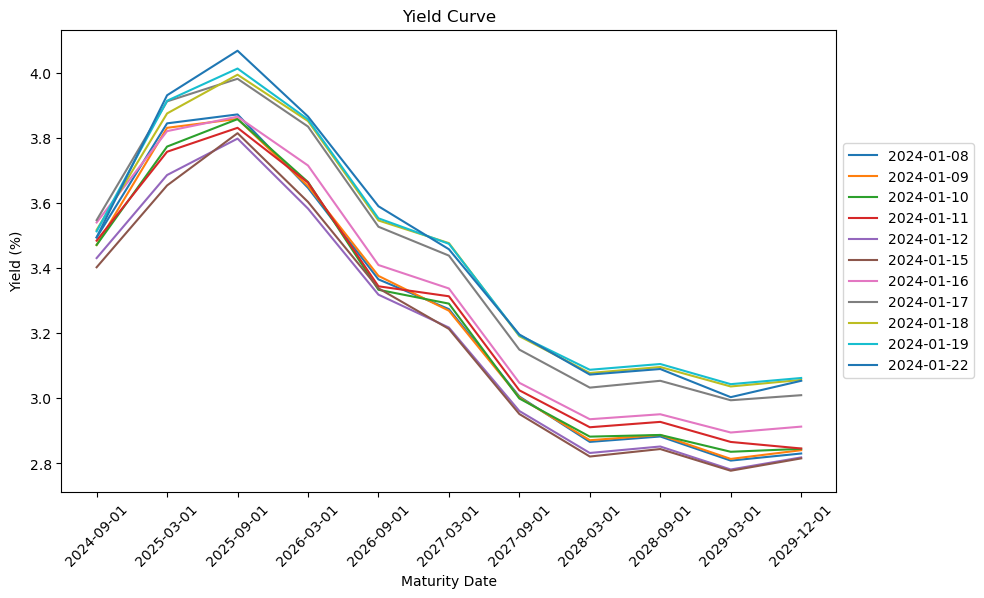

In [75]:
## for each key in the dictionary, plot the values in the list as a line plot
plt.figure(figsize=(10, 6))
for key in spot_rate_dict:
    x = spot_rate_dict[key][0]
    # bigger plot so every thing fits, and the legends is outside the plot, so it does not cover the plot
    y = spot_rate_dict[key][1] * 100
    plt.plot(x, y, label=key)
    plt.xlabel('Maturity Date')
    plt.ylabel('Yield (%)')
    plt.title('Yield Curve')
    plt.xticks(rotation=45)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


## Forward Rate

In [76]:
def forward_rate(spot_rate):
    """
    spot_rate: a list of spot rates
    """
    forward_rate = []
    spot_rate1 = spot_rate[0]
    forward_rate.append(spot_rate1)
    i = 1
    while i < len(spot_rate):
        forward_rate.append((spot_rate[i] * (i+1) - spot_rate1) / i)
        i += 1
    return forward_rate

In [77]:
## from spot_rate_dict
forward_rate_dict = {}

for col in price_columns:
    forward_rate_dict[col] = []

for col in price_columns:
    spot_rates = []
    for i in range(len(spot_rate_dict[col][1]))[1:8:2]: # getting the march ones
        
        spot_rate = spot_rate_dict[col][1][i]
        
        spot_rates.append(spot_rate)
    
    forward_rate_dict[col]=(forward_rate(spot_rates))
forward_rate_dict




{'2024-01-08': [0.03844546582350353,
  0.03448392430250796,
  0.029887161289349498,
  0.02540067633740277],
 '2024-01-09': [0.03830793642422516,
  0.03472898336466521,
  0.02988285617537127,
  0.025515097900511763],
 '2024-01-10': [0.03773192054010957,
  0.03555431313102089,
  0.030496593697247124,
  0.02585393498097158],
 '2024-01-11': [0.03757269934027873,
  0.03568026361200579,
  0.030914697296071676,
  0.026290871867946614],
 '2024-01-12': [0.03685770710258316,
  0.034796057820862446,
  0.02983117727981704,
  0.025476133130106104],
 '2024-01-15': [0.036538049438710495,
  0.03552545534164172,
  0.029929152692238014,
  0.025437140425554672],
 '2024-01-16': [0.038205932898468256,
  0.036095253316181686,
  0.030957705910443334,
  0.02640845892865074],
 '2024-01-17': [0.03912001839073522,
  0.0375733708116587,
  0.032014893510845466,
  0.027397975708982104],
 '2024-01-18': [0.03874925248209038,
  0.03828280283999291,
  0.03277618550395746,
  0.02812063258029962],
 '2024-01-19': [0.03913

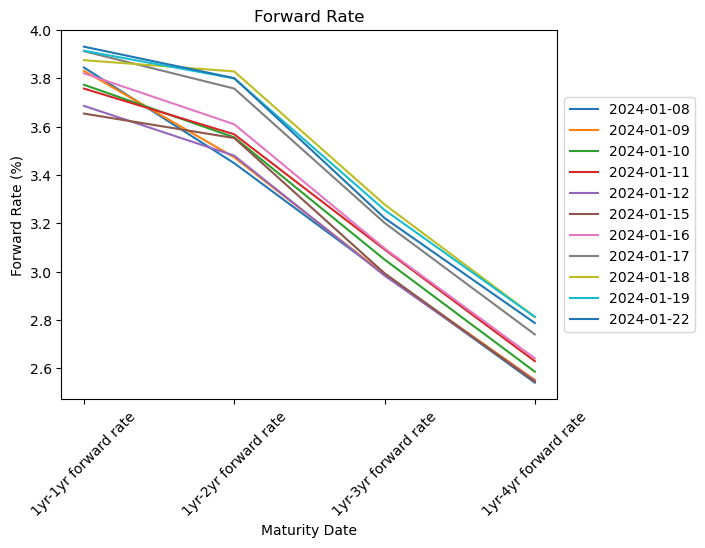

In [78]:
dates = ['1yr-1yr forward rate', '1yr-2yr forward rate', '1yr-3yr forward rate', '1yr-4yr forward rate']
for key in forward_rate_dict:
    plt.plot(dates, np.array(forward_rate_dict[key])*100 , label=key)
    plt.xlabel('Maturity Date')
    plt.ylabel('Forward Rate (%)')
    plt.title('Forward Rate')
    plt.xticks(rotation=45)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))